In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
%matplotlib inline

##Data 1st Look

In [2]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
data[data['HeartDisease'] == 0].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049,0.0
std,9.444915,16.499585,74.634659,0.309894,23.288067,0.699709,0.0
min,28.000000,80.000000,0.000000,0.000000,69.000000,-1.100000,0.0
25%,43.000000,120.000000,197.250000,0.000000,134.000000,0.000000,0.0
50%,51.000000,130.000000,227.000000,0.000000,150.000000,0.000000,0.0
75%,57.000000,140.000000,266.750000,0.000000,165.000000,0.600000,0.0
max,76.000000,190.000000,564.000000,1.000000,202.000000,4.200000,0.0


In [6]:
data[data['HeartDisease'] == 1].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


**This dataset represents a sample of individuals aged between 28 and 77 years, with a significant proportion experiencing heart disease** <br>
**Notably, individuals without heart disease tend to be slightly younger, with lower resting blood pressure and blood sugar levels. Moreover, they exhibit less ST depression during exercise and achieve a higher maximum heart rate compared to those with heart disease, which is peculiar** <br>
**Also there is some outliers (Cholesterol = 0, RestingBP = 0 etc)**

In [7]:
features = ['RestingBP', 'Cholesterol', 'MaxHR']

z_scores = np.abs(stats.zscore(data[features]))
outlier_indices = np.where(z_scores > 3)

print("Indices of outliers:", outlier_indices)

Indices of outliers: (array([ 76, 109, 149, 241, 365, 390, 399, 449, 592, 616, 732, 759]), array([1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0]))


**Most outliers are from Blood Pressure metric ('RestingBP'), lets clear them out (12 obseravations)**

In [8]:
data = data[(z_scores < 3).all(axis=1)]

##Factor Metrics

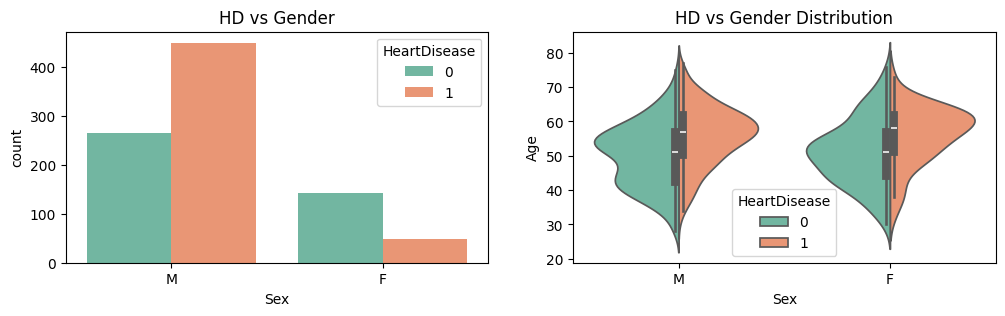

In [9]:
f, ax = plt.subplots(1, 2, figsize=(12,3))

sns.countplot(data, x='Sex',hue='HeartDisease', ax=ax[0], palette='Set2')
ax[0].set_title('HD vs Gender')

sns.violinplot(data, x="Sex", y="Age", hue="HeartDisease", ax=ax[1], palette='Set2', split=True)
ax[1].set_title('HD vs Gender Distribution')

plt.show()

**Men are significantly more susceptible to Heart Diseases (HD) compared to women.** <br>
**People of both sexes with HD tend to be slightly older (most frequent one 55 - 63 years old), however, the age of women with HD on average is slightly higher than that of men**

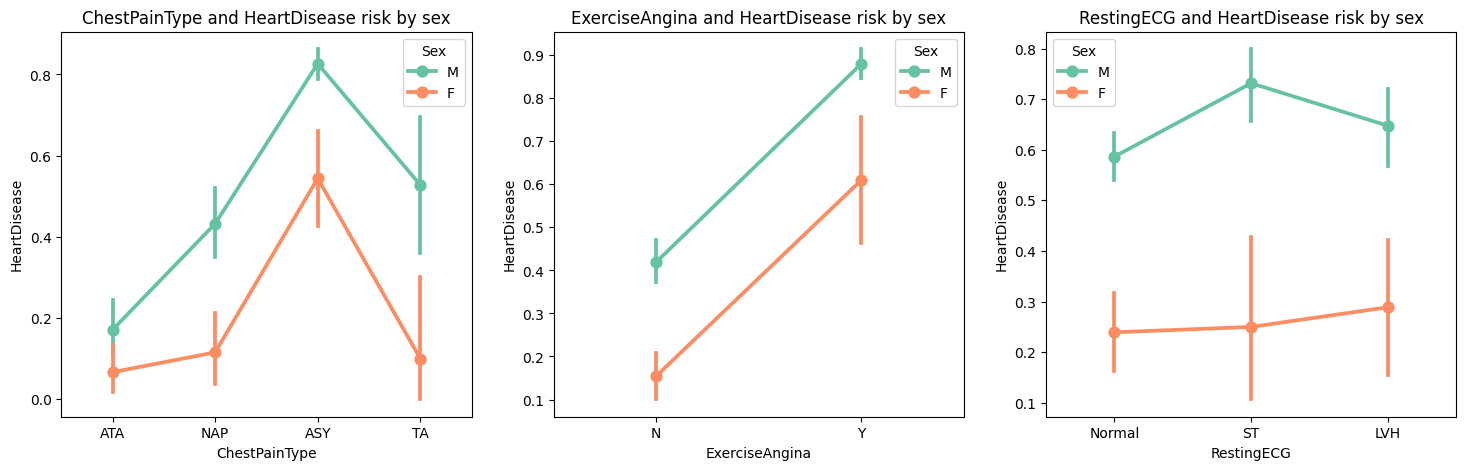

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.pointplot(data=data, x='ChestPainType', y='HeartDisease', hue='Sex', palette='Set2', ax=ax[0])
ax[0].set_title('ChestPainType and HeartDisease risk by sex')

sns.pointplot(data=data, x='ExerciseAngina', y='HeartDisease', hue='Sex', palette='Set2', ax=ax[1])
ax[1].set_title('ExerciseAngina and HeartDisease risk by sex')

sns.pointplot(data=data, x='RestingECG', y='HeartDisease', hue='Sex', palette='Set2', ax=ax[2])
ax[2].set_title('RestingECG and HeartDisease risk by sex')

plt.show()

**Chest Pain Type - people who have no symptoms (ASY) have considerably higher risk of HD in comparison with pain symptoms, overall Chest Pain Type severity level could be arranged in following order (will be considered futher in correlation analisys):** <br>  <br>
**Atypical Angina (ATA) -> Typical Angina (TA) -> Non-Anginal Pain (NAP) -> Asymptomatic (ASA)** <br> <br>
**People with exercise-induced angina have greater chance to have HD** <br> <br>
**Resting ECG type seems don't play significant role in HD risk**

[(27.999, 47.0], (47.0, 54.0], (54.0, 60.0], (60.0, 77.0]]
Categories (4, interval[float64, right]): [(27.999, 47.0] < (47.0, 54.0] < (54.0, 60.0] <
                                           (60.0, 77.0]]

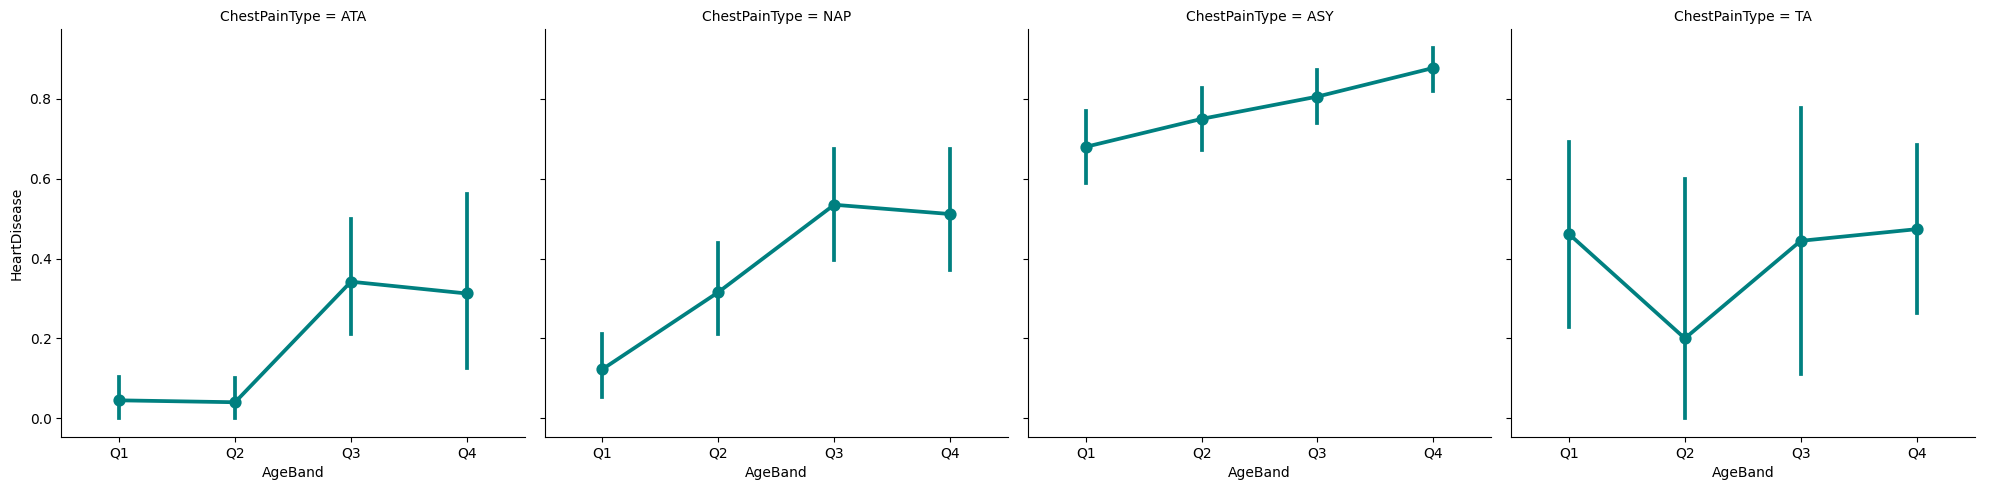

In [11]:
data['AgeBand'] = pd.qcut(data['Age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
sns.catplot(data, x='AgeBand', y='HeartDisease', col='ChestPainType', kind='point', color='teal')
pd.qcut(data['Age'], q=4).unique().sort_values()

**Individuals who do not exhibit chest pain symptoms (ASA) with possed elevated risk factors appear to display a more natural distribution of the age of onset of HD. This observation suggests that ChestPainType metric factor order could be a reliable for correlation analysis**

<Axes: >

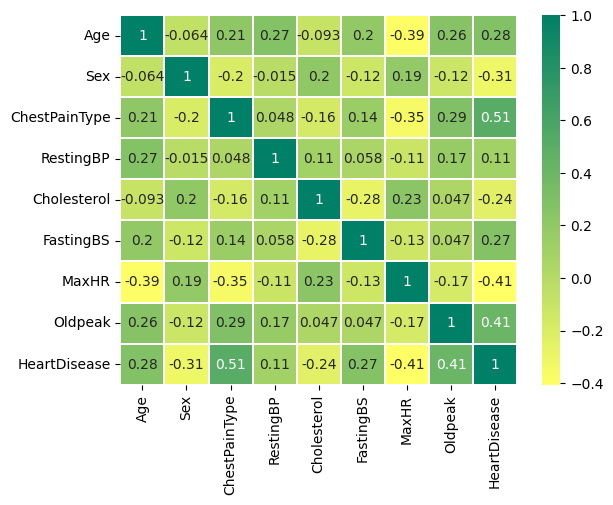

In [12]:
data['Sex'].replace(['M','F'], [0,1], inplace=True)
data['ChestPainType'].replace(['ATA', 'TA', 'NAP', 'ASY'], [0,1,2,3], inplace=True)

data_corr = data.drop(['AgeBand', 'ExerciseAngina', 'RestingECG', 'ST_Slope' ], axis=1)

sns.heatmap(data_corr.corr(), annot=True, cmap='summer_r', linewidths=0.2)

**Age, Chest Pain Type (from ordinal pain to no symptoms), blood sugar and amount of depression of the ST segment on an ECG during exercise are considerably positivelly asociated with HD. Conversely, female gender, higher max heart rate and higher Cholesterol level appear to confer protection against HD**

##Continious Metrics

[(-0.001, 174.25], (174.25, 222.5], (222.5, 266.0], (266.0, 518.0]]
Categories (4, interval[float64, right]): [(-0.001, 174.25] < (174.25, 222.5] < (222.5, 266.0] <
                                           (266.0, 518.0]]

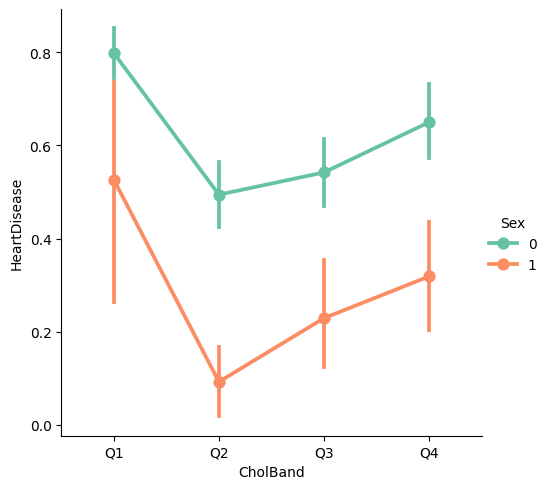

In [13]:
data['CholBand'] = pd.qcut(data['Cholesterol'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
sns.catplot(data, x='CholBand', y='HeartDisease', hue='Sex', kind='point', palette='Set2')
pd.qcut(data['Cholesterol'], q=4).unique().sort_values()

**Interestingly, having a lower cholesterol level below 173.25 is associated with a significantly higher chance of developing HD compared to those with elveated levels. However, as cholesterol levels rise beyond the range of (173.25, 223.0], the risk of HD increases**

[(-2.601, 0.0], (0.0, 0.55], (0.55, 1.5], (1.5, 6.2]]
Categories (4, interval[float64, right]): [(-2.601, 0.0] < (0.0, 0.55] < (0.55, 1.5] < (1.5, 6.2]]

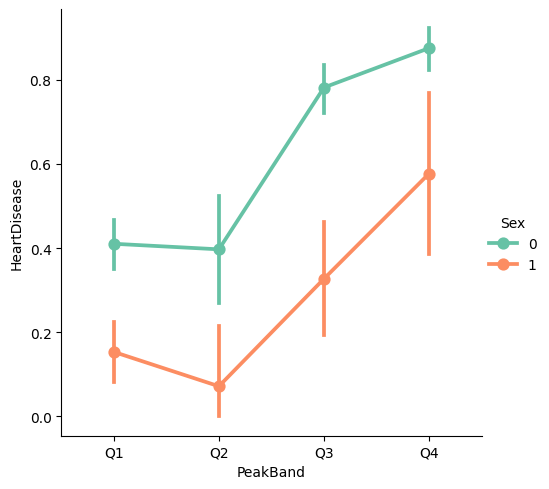

In [14]:
data['PeakBand'] = pd.qcut(data['Oldpeak'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
sns.catplot(data, x='PeakBand', y='HeartDisease', hue='Sex', kind='point', palette='Set2')
pd.qcut(data['Oldpeak'], q=4).unique().sort_values()

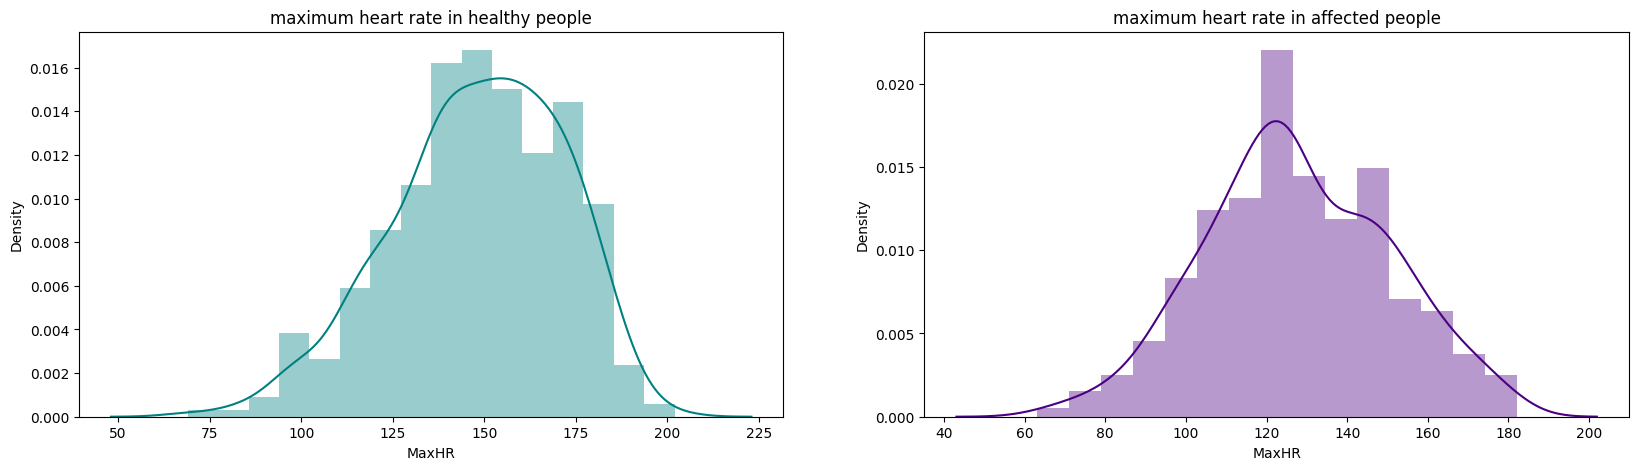

In [15]:
f, ax = plt.subplots(1,2, figsize=(20,5))

sns.distplot(data[data['HeartDisease']==0].MaxHR, ax=ax[0], color='teal')
ax[0].set_title('maximum heart rate in healthy people')

sns.distplot(data[data['HeartDisease']==1].MaxHR, ax=ax[1], color='indigo')
ax[1].set_title('maximum heart rate in affected people')

plt.show()

##To summarize, some indicators intuitively contradict expectations (maximum heart rate, cholesterol level), probably there is a complex relationship with other factors. In genereal metrics like ExerciseAngina, Chest pain, Age, Max HR, Sex and Oldpeak seem to be best predictors for HD risk